In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [ ]:
df_raw = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/COVIDVaccinePjt/vaccination_tweets.csv')
df = df_raw.copy()
df.head(5)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [ ]:
df.describe()

,id,user_followers,user_friends,user_favourites,retweets,favorites
count,5.338000e+03,5.338000e+03,5338.000000,5338.000000,5338.000000,5338.000000
mean,1.347095e+18,3.889431e+04,1167.668228,13350.047583,1.652866,9.801236
std,5.703583e+15,3.393434e+05,2582.519729,38332.910769,14.578866,68.408480
min,1.337728e+18,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1.341733e+18,1.080000e+02,164.000000,379.250000,0.000000,0.000000
50%,1.347523e+18,4.775000e+02,463.000000,2016.000000,0.000000,1.000000
75%,1.351601e+18,2.083000e+03,1246.750000,10307.000000,1.000000,4.000000
max,1.358646e+18,1.371493e+07,99129.000000,924667.000000,678.000000,2315.000000


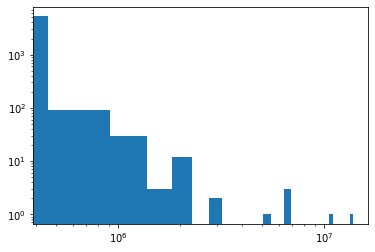

In [26]:
#팔로워 히스토그램(소수의 인플루언서 존재)
plt.hist(df["user_followers"], bins=30)
plt.yscale('log')
plt.xscale('log')
plt.show()

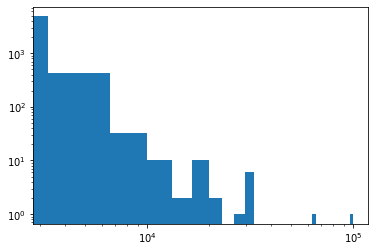

In [34]:
#친구 수 히스토그램(비슷한 양상)
plt.hist(df["user_friends"], bins=30)
plt.yscale('log')
plt.xscale('log')
plt.show()

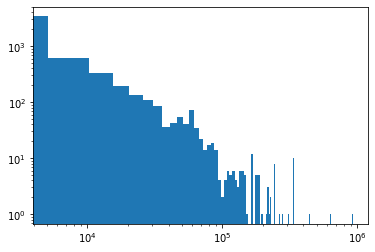

In [40]:
#트윗 좋아요 수 히스토그램
plt.hist(df["user_favourites"], bins=180)
plt.yscale('log')
plt.xscale('log')
plt.show()

In [47]:
df_numeric = df[['user_followers','user_friends','user_favourites','retweets','favorites']]
df_numeric.head(5)

,user_followers,user_friends,user_favourites,retweets,favorites
0,405,1692,3247,0,0
1,834,666,178,1,1
2,10,88,155,0,0
3,49165,3933,21853,446,2129
4,152,580,1473,0,0


In [50]:
#리트윗과 favoites를 제외하면 유믜미한 상관관계가 딱히 없어보임.
#user_favourite과 favorites의 차이는? --> 전체 좋아요 수 / 해당 게시물의 좋아요 수 차이로 보임.
df_numeric.corr()

,user_followers,user_friends,user_favourites,retweets,favorites
user_followers,1.000000,-0.022265,-0.030480,0.067423,0.044975
user_friends,-0.022265,1.000000,0.215115,0.012330,0.011268
user_favourites,-0.030480,0.215115,1.000000,0.011590,0.008196
retweets,0.067423,0.012330,0.011590,1.000000,0.631784
favorites,0.044975,0.011268,0.008196,0.631784,1.000000


In [56]:
#팔로워 200명 이내인 사람들이 쓴 트윗
filt_1 = (df.user_followers < 200)
df_under200tweets = df.loc[filt_1, ['text']]
df_under200tweets

,text
2,#coronavirus #SputnikV #AstraZeneca #PfizerBio...
4,Explain to me again why we need a vaccine @Bor...
5,Does anyone have any useful advice/guidance fo...
11,@cnnbrk #COVID19 #CovidVaccine #vaccine #Coron...
19,The trump administration failed to deliver on ...
...,...
5332,I hope this ages like milk:\nAfter the #EU has...
5333,So proud to be part of #TeamVaccine A long ...
5334,@xkcd @SMBCComics\n\nExcellent explanation of ...
5335,Hope to be on fire after getting first dose of...


In [67]:
#팔로워 천명 이내인 사람들이 쓴 트윗
filt_2 = (df.user_followers < 1000) & (df.user_followers >= 200)
df_under1000tweets = df.loc[filt_2, ['text']]
df_under1000tweets

,text
0,Same folks said daikon paste could treat a cyt...
1,While the world has been on the wrong side of ...
8,Covid vaccine; You getting it?\n\n #CovidVacci...
9,#CovidVaccine \n\nStates will start getting #C...
16,UPDATED: #YellowFever &amp; #COVID19 #Immunity...
...,...
5324,@adamsonjon @mr_numbers @CraigNikolic @HPIAndy...
5325,Anaphylaxis &amp; other #COVID19 #vaccine side...
5327,#PfizerBioNTech and #Moderna vax cannot be cal...
5330,It’s reporting season next week for the vaccin...


In [80]:
#팔로워 50만명 이상인 사람들이 적은 트윗
filt_3 = (df.user_followers >= 500000)
df_over500Ktweets = df.loc[filt_3, ['text','user_location']]
df_over500Ktweets

,text,user_location,user_description
109,#UPDATE A nurse in New York City on Monday bec...,France,Top news and features from AFP's reporters aro...
138,#Singapore became on Monday the first Asian co...,Bangladesh,Bangladesh's largest English Daily. The latest...
169,"""The first batch of doses of Pfizer-BioNTech’s...",NaN,Follow business news with India's Leading Busi...
197,#PfizerBioNTech COVID-vaccine given the green ...,NaN,"RT, the global news network, broadcasts from M..."
227,#UPDATE The #PfizerBioNTech Covid-19 vaccine b...,France,Top news and features from AFP's reporters aro...
...,...,...,...
5199,"#NSTnation: ""The government has successfully p...",Malaysia,"News, views and up-to-date reports from Malays..."
5269,#UPDATE Sales of the Covid-19 vaccine develope...,France,Top news and features from AFP's reporters aro...
5274,Pfizer-BioNTech to produce 2 billion doses of ...,India,India’s most watched Hindi News Channel. Follo...
5323,#NSTnation Dr Noor Hisham said this after part...,Malaysia,"News, views and up-to-date reports from Malays..."


In [73]:
#미국이 없네
df_over500Ktweets['user_location'].unique()

array(['France', 'Bangladesh', nan, 'New Delhi, India', 'Malaysia',
       'India', 'United Arab Emirates', 'Nigeria', 'Chennai, India',
       'South Africa', 'Mumbai', 'Beijing, China', 'Abu Dhabi, UAE',
       'Naccache, Lebanon', 'London', 'Putrajaya'], dtype=object)

In [74]:
#팔로워 10만명 이상인 사람들이 적은 트윗 및 국가
filt_4 = (df.user_followers >= 100000)
df_over100Ktweets = df.loc[filt_4, ['text','user_location']]
df_over100Ktweets

,text,user_location
12,The agency also released new information for h...,India
44,#FDA authorizes #PfizerBioNTech #coronavirus v...,Egypt
109,#UPDATE A nurse in New York City on Monday bec...,France
138,#Singapore became on Monday the first Asian co...,Bangladesh
169,"""The first batch of doses of Pfizer-BioNTech’s...",NaN
...,...,...
5274,Pfizer-BioNTech to produce 2 billion doses of ...,India
5305,"#BREAKING: Tunisia, Palestinian territories to...",Saudi Arabia
5307,"❝#Vaccines | An important step forward, a resp...","Paris, France"
5323,#NSTnation Dr Noor Hisham said this after part...,Malaysia


In [75]:
#미국 외 지역에서 상대적으로 팔로우가 높은듯...
df_over100Ktweets['user_location'].unique()

array(['India', 'Egypt', 'France', 'Bangladesh', nan, 'Global',
       'Worldwide 🌏', 'New York, USA', 'New Delhi, India', 'Malaysia',
       'Miami', 'United Arab Emirates', 'Nigeria', 'Saudi Arabia',
       'Swat. Washington DC. Denver ', 'Chennai, India', 'South Africa',
       'Chennai', 'Istanbul, Turkey', 'Mumbai', 'Beijing, China',
       'Jeddah, Saudi Arabia', 'Prof. Abdullah AlShayji-Kuwait',
       'Dubai, United Arab Emirates', 'Doha, Qatar', 'Israel',
       'Abu Dhabi, UAE', 'Naccache, Lebanon', 'United Kingdom', 'London',
       'Poole, England', 'Putrajaya', 'Beijing', 'Bengaluru', 'Brussels',
       'Paris, France'], dtype=object)

In [82]:
df_sort_retweets = df.sort_values(by="retweets", ascending=False)
df_sort_retweets.head(25)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
3440,1350535798366547969,The Epoch Times,"New York, USA","An independent, award-winning voice in print &...",2009-04-05 23:54:55,403105,80,29047,True,2021-01-16 20:10:00,55 people in the US have died after receiving ...,"['Vaccine', 'COVID19']",Buffer,678,654,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4213,1352443555957010438,KKMalaysia🇲🇾,Putrajaya,"The Official twitter for Ministry Of Health, M...",2012-03-20 05:59:03,1144487,97,2146,True,2021-01-22 02:30:45,What do you need to know about #PfizerBioNTech...,"['PfizerBioNTech', 'COVID19', 'CovidVaccine']",Twitter for Android,389,472,False
183,1338287664454393858,Anita Anand,"Oakville, Ontario",MP for #Oakville & Minister of Public Services...,2012-02-01 13:38:10,8410,2228,10393,True,2020-12-14 01:00:18,Welcoming the 1st #COVID19vaccines to 🇨🇦 tonig...,"['COVID19vaccines', 'PfizerBioNTech']",Twitter for iPhone,284,1979,False
3004,1348068786587500547,Anita Anand,"Oakville, Ontario",MP for #Oakville & Minister of Public Services...,2012-02-01 13:38:10,9381,2259,10658,True,2021-01-10 00:46:59,🇨🇦 has received &amp; distributed over half a ...,"['PfizerBioNTech', 'Moderna']",Twitter for iPhone,230,790,False
2826,1347921247083122689,Chris Ship,"London, England",ITV NEWS Royal Editor. Tweeting the newsworthy...,2009-12-09 20:08:47,73534,1528,2108,True,2021-01-09 15:00:43,A Palace source said the vaccines were adminis...,NaN,Twitter for iPhone,199,1422,False
922,1340456887817560065,The Epoch Times,"New York, USA","An independent, award-winning voice in print &...",2009-04-05 23:54:55,455202,90,28251,True,2020-12-20 00:40:01,The @US_FDA is investigating around 5 allergic...,NaN,Buffer,176,288,False
793,1340304234416381954,Senator Shehu Sani,Nigeria,Human Rights Activist | Author | PanAfricanist...,2010-02-24 10:39:37,1772291,2153,5272,True,2020-12-19 14:33:25,The Western media deliberately down played or ...,"['coronavirus', 'Pfizer']",Twitter for iPhone,115,750,False
3867,1351092932812660741,Monica Chopra Jagtap,"Mumbai, India",A Congresswoman ...A Doctor..An Advocate...Vic...,2010-09-29 16:13:53,2168,453,22401,False,2021-01-18 09:03:51,Display board in Ireland says it all. It’s a m...,NaN,Twitter for iPhone,112,118,False
1125,1342227972649054208,Marika Ntrekos,Divine Spirit,Our World🌐 Is Changing & So Are 🧬We\n ...,2019-07-30 20:39:06,2886,2394,17522,False,2020-12-24 21:57:40,LETHAL INJECTION 💉 🤣\n\n#PfizerBioNTech #pfize...,"['PfizerBioNTech', 'pfizercovidvaccine', 'Pota...",Twitter for Android,104,151,False
